# Initialisation des données

In [1]:
!pip install folium

In [2]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import folium

In [3]:
r = requests.get("https://public.opendatasoft.com/api/records/1.0/search/?dataset=buildingref-france-arcep-mobile-site-2g3g4g&q=&rows=-1")
r.status_code

200

In [4]:
a_json = r.json()['records']
a_json

[{'datasetid': 'buildingref-france-arcep-mobile-site-2g3g4g',
  'recordid': 'c7fad66486e02cfca736753391246b564c9fc574',
  'fields': {'site_import': 'non',
   'com_code': '83126',
   'reg_code': '93',
   'dep_name': 'Var',
   'site_zb': 'non',
   'epci_code': '248300543',
   'reg_name': "Provence-Alpes-Côte d'Azur",
   'geo_point_2d': [43.0857721026, 5.8829725065],
   'release_last_quarter_4g': 'non',
   'dep_code': '83',
   'geo_shape': {'type': 'MultiPoint',
    'coordinates': [[5.8829725065, 43.0857721026]]},
   'op_name': 'SFR',
   'op_code': '20810',
   'op_site_id': '830157',
   'epci_name': 'Métropole Toulon-Provence-Méditerranée',
   'technology': '2G,3G,4G',
   'site_dcc': 'non',
   'com_name': 'La Seyne-sur-Mer'},
  'geometry': {'type': 'Point', 'coordinates': [5.8829725065, 43.0857721026]},
  'record_timestamp': '2021-09-27T18:33:00+00:00'},
 {'datasetid': 'buildingref-france-arcep-mobile-site-2g3g4g',
  'recordid': '4ec0fe50b57c01a7ccff104e4439623e52f29c80',
  'fields': {'si

In [5]:
dataframe = pd.DataFrame.from_dict(a_json)
dataframe

,datasetid,recordid,fields,geometry,record_timestamp
0,buildingref-france-arcep-mobile-site-2g3g4g,c7fad66486e02cfca736753391246b564c9fc574,"{'site_import': 'non', 'com_code': '83126', 'r...","{'type': 'Point', 'coordinates': [5.8829725065...",2021-09-27T18:33:00+00:00
1,buildingref-france-arcep-mobile-site-2g3g4g,4ec0fe50b57c01a7ccff104e4439623e52f29c80,"{'site_import': 'non', 'com_code': '83126', 'r...","{'type': 'Point', 'coordinates': [5.8624116457...",2021-09-27T18:33:00+00:00
2,buildingref-france-arcep-mobile-site-2g3g4g,bc27be521b67db75a4069a517c179d7d6aa90593,"{'site_import': 'non', 'com_code': '83129', 'r...","{'type': 'Point', 'coordinates': [5.8244419375...",2021-09-27T18:33:00+00:00
3,buildingref-france-arcep-mobile-site-2g3g4g,ac6900dad6c366e5558fa5ba370bb69ab0c8af1b,"{'site_import': 'non', 'com_code': '83130', 'r...","{'type': 'Point', 'coordinates': [6.0461154177...",2021-09-27T18:33:00+00:00
4,buildingref-france-arcep-mobile-site-2g3g4g,915d0276a32868a70775f9c2e102de32657faf87,"{'site_import': 'non', 'com_code': '83132', 'r...","{'type': 'Point', 'coordinates': [6.0486123424...",2021-09-27T18:33:00+00:00
...,...,...,...,...,...
9995,buildingref-france-arcep-mobile-site-2g3g4g,14f0c5ef21cc491f3566cb97905ea5e25d13da8d,"{'site_import': 'non', 'com_code': '06088', 'r...","{'type': 'Point', 'coordinates': [7.2505523431...",2021-09-27T18:33:00+00:00
9996,buildingref-france-arcep-mobile-site-2g3g4g,0e83d9d8ca7ce7c8853305ce017989ba34291f2b,"{'site_import': 'non', 'com_code': '06088', 'r...","{'type': 'Point', 'coordinates': [7.2542372596...",2021-09-27T18:33:00+00:00
9997,buildingref-france-arcep-mobile-site-2g3g4g,c7b1f3e33d43ca23a6439d41f8d0a51f45f7c5db,"{'site_import': 'non', 'com_code': '06088', 'r...","{'type': 'Point', 'coordinates': [7.226506895,...",2021-09-27T18:33:00+00:00
9998,buildingref-france-arcep-mobile-site-2g3g4g,38e347593fa8bbf1375ccb90cc1e98c674f9d2c6,"{'site_import': 'non', 'com_code': '06088', 'r...","{'type': 'Point', 'coordinates': [7.3077743941...",2021-09-27T18:33:00+00:00


In [6]:
## Seul le contenu de "fields" est récupéré 
fields = []
for i in range(len(dataframe['fields'])):
    fields.append(dataframe['fields'][i])
dataframe = pd.DataFrame.from_dict(fields)
dataframe

,site_import,com_code,reg_code,dep_name,site_zb,epci_code,reg_name,geo_point_2d,release_last_quarter_4g,dep_code,geo_shape,op_name,op_code,op_site_id,epci_name,technology,site_dcc,com_name,ept_name,ept_code
0,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.0857721026, 5.8829725065]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8829...",SFR,20810,830157,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN
1,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1010447372, 5.8624116457]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8624...",Bouygues Telecom,20820,T22194,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN
2,non,83129,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1155201286, 5.8244419375]",non,83,"{'type': 'MultiPoint', 'coordinates': [[5.8244...",SFR,20810,830041,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,Six-Fours-les-Plages,NaN,NaN
3,non,83130,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1983321684, 6.0461154177]",non,83,"{'type': 'MultiPoint', 'coordinates': [[6.0461...",Free Mobile,20815,83130_002,CC de la Vallée du Gapeau,"3G,4G,5G",non,Solliès-Pont,NaN,NaN
4,non,83132,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1736153684, 6.0486123424]",non,83,"{'type': 'MultiPoint', 'coordinates': [[6.0486...",Orange,20801,00017197J5,CC de la Vallée du Gapeau,"2G,3G,4G",non,Solliès-Ville,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7002756114, 7.2505523431]",non,06,"{'type': 'MultiPoint', 'coordinates': [[7.2505...",Orange,20801,00013402J2,Métropole Nice Côte d'Azur,"2G,3G,4G,5G",non,Nice,NaN,NaN
9996,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.70606997, 7.2542372596]",non,06,"{'type': 'MultiPoint', 'coordinates': [[7.2542...",Bouygues Telecom,20820,T20122,Métropole Nice Côte d'Azur,"2G,3G,4G,5G",non,Nice,NaN,NaN
9997,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7033125264, 7.226506895]",non,06,"{'type': 'MultiPoint', 'coordinates': [[7.2265...",Bouygues Telecom,20820,T20149,Métropole Nice Côte d'Azur,"2G,3G,4G",non,Nice,NaN,NaN
9998,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7380537877, 7.3077743941]",non,06,"{'type': 'MultiPoint', 'coordinates': [[7.3077...",Orange,20801,00033214J2,Métropole Nice Côte d'Azur,"2G,3G,4G",non,Nice,NaN,NaN


# Taux de couverture de la France en 5G (Régions, Départements, Communes)

In [7]:
## Tri pour obtenir la technologie la plus récente
dernières_technos = []
for i in range(len(dataframe['technology'])):
    dernières_technos.append(dataframe['technology'][i].split(',')[-1])
dataframe = dataframe.assign(last_technology=dernières_technos)
dataframe.head()

,site_import,com_code,reg_code,dep_name,site_zb,epci_code,reg_name,geo_point_2d,release_last_quarter_4g,dep_code,...,op_name,op_code,op_site_id,epci_name,technology,site_dcc,com_name,ept_name,ept_code,last_technology
0,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.0857721026, 5.8829725065]",non,83,...,SFR,20810,830157,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN,4G
1,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1010447372, 5.8624116457]",non,83,...,Bouygues Telecom,20820,T22194,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN,4G
2,non,83129,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1155201286, 5.8244419375]",non,83,...,SFR,20810,830041,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,Six-Fours-les-Plages,NaN,NaN,4G
3,non,83130,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1983321684, 6.0461154177]",non,83,...,Free Mobile,20815,83130_002,CC de la Vallée du Gapeau,"3G,4G,5G",non,Solliès-Pont,NaN,NaN,5G
4,non,83132,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1736153684, 6.0486123424]",non,83,...,Orange,20801,00017197J5,CC de la Vallée du Gapeau,"2G,3G,4G",non,Solliès-Ville,NaN,NaN,4G


In [8]:
## Tri pour obtenir la technologie la plus récente
dataframe['last_technology'] = dataframe.technology.apply(lambda x: x.split(',')[-1])
dataframe

,site_import,com_code,reg_code,dep_name,site_zb,epci_code,reg_name,geo_point_2d,release_last_quarter_4g,dep_code,...,op_name,op_code,op_site_id,epci_name,technology,site_dcc,com_name,ept_name,ept_code,last_technology
0,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.0857721026, 5.8829725065]",non,83,...,SFR,20810,830157,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN,4G
1,non,83126,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1010447372, 5.8624116457]",non,83,...,Bouygues Telecom,20820,T22194,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,La Seyne-sur-Mer,NaN,NaN,4G
2,non,83129,93,Var,non,248300543,Provence-Alpes-Côte d'Azur,"[43.1155201286, 5.8244419375]",non,83,...,SFR,20810,830041,Métropole Toulon-Provence-Méditerranée,"2G,3G,4G",non,Six-Fours-les-Plages,NaN,NaN,4G
3,non,83130,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1983321684, 6.0461154177]",non,83,...,Free Mobile,20815,83130_002,CC de la Vallée du Gapeau,"3G,4G,5G",non,Solliès-Pont,NaN,NaN,5G
4,non,83132,93,Var,non,248300410,Provence-Alpes-Côte d'Azur,"[43.1736153684, 6.0486123424]",non,83,...,Orange,20801,00017197J5,CC de la Vallée du Gapeau,"2G,3G,4G",non,Solliès-Ville,NaN,NaN,4G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7002756114, 7.2505523431]",non,06,...,Orange,20801,00013402J2,Métropole Nice Côte d'Azur,"2G,3G,4G,5G",non,Nice,NaN,NaN,5G
9996,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.70606997, 7.2542372596]",non,06,...,Bouygues Telecom,20820,T20122,Métropole Nice Côte d'Azur,"2G,3G,4G,5G",non,Nice,NaN,NaN,5G
9997,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7033125264, 7.226506895]",non,06,...,Bouygues Telecom,20820,T20149,Métropole Nice Côte d'Azur,"2G,3G,4G",non,Nice,NaN,NaN,4G
9998,non,06088,93,Alpes-Maritimes,non,200030195,Provence-Alpes-Côte d'Azur,"[43.7380537877, 7.3077743941]",non,06,...,Orange,20801,00033214J2,Métropole Nice Côte d'Azur,"2G,3G,4G",non,Nice,NaN,NaN,4G


## Taux de communes couvertes

In [9]:
_not5G = dataframe.last_technology != "5G"
_not5G
_titles = ['last_technology', 'com_name']
nb_sites_communes_not5G = dataframe[_titles][_not5G].value_counts("com_name").sort_index(axis=0)
nb_sites_communes_not5G

com_name
Abidos                1
Ablis                 1
Abondance             1
Aboën                 1
Abriès-Ristolas       1
                     ..
Évriguet              2
Évron                 1
Évry-Courcouronnes    3
Île-aux-Moines        1
Œting                 1
Length: 5567, dtype: int64

In [10]:
## Nombre de sites 5G par communes
_5G = dataframe.last_technology == "5G"
_5G
_titles = ['last_technology', 'com_name']
nb_sites_communes_5G = dataframe[_titles][_5G].value_counts("com_name").sort_index(axis=0)
nb_sites_communes_5G

com_name
Ablon-sur-Seine       1
Agen-d'Aveyron        1
Agnetz                1
Aignes                1
Aigurande             1
                     ..
Épinal                1
Épinay-sur-Orge       1
Épinay-sur-Seine      2
Étréchy               1
Évry-Courcouronnes    1
Length: 1015, dtype: int64

In [11]:
## Nombre de sites 5G par communes
liste_communes_5G = dataframe.query('last_technology.str.contains("5G")', engine="python").filter(items=['com_name']).value_counts()
liste_communes_5G

com_name          
Marseille             48
Paris                 27
Lyon                  21
Nice                  20
Toulouse              14
                      ..
Hartennes-et-Taux      1
Haubourdin             1
Hauconcourt            1
Hauts de Bienne        1
Évry-Courcouronnes     1
Length: 1015, dtype: int64

### Calcul du pourcentage

In [12]:
## Effectif de communes dotées de la 5G
nb_communes_5G = nb_sites_communes_5G.count()
nb_communes_5G

1015

In [13]:
## Effectif total des communes
nb_communes = dataframe.filter(items=['com_name']).drop_duplicates(subset=['com_name']).count()['com_name']
nb_communes

6058

In [14]:
## Calcul du taux de communes dotées de la 5G
taux_communes_5G = (nb_communes_5G * 100) / nb_communes
taux_communes_5G

16.754704522944866

In [15]:
## Calcul du taux de communes sans 5G
taux_communes_sans_5G = 100 - taux_communes_5G
taux_communes_sans_5G

83.24529547705514

### Affichage du diagramme

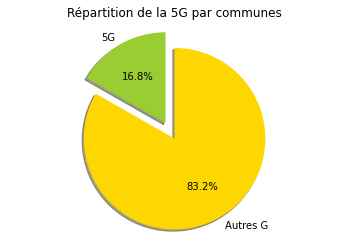

In [16]:
labels = ['5G', 'Autres G']
sizes = [taux_communes_5G, taux_communes_sans_5G]
colors = ['yellowgreen', 'gold']
explode = (0, 0.2)

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
ax.set_title("Répartition de la 5G par communes")

plt.show()

## Par Départements

In [17]:
## Liste des départements qui ont la 5G
liste_departements_5G = dataframe.query('last_technology.str.contains("5G")', engine="python").filter(items=['dep_name']).drop_duplicates(subset=['dep_name'])
liste_departements_5G

,dep_name
3,Var
23,Vaucluse
49,Vendée
80,Vienne
104,Haute-Vienne
...,...
5654,Aude
5781,Finistère
6435,Savoie
6723,Alpes-de-Haute-Provence


### Calcul du pourcentage

In [18]:
## Effectif de départements dotés de la 5G
nb_departements_5G = liste_departements_5G.count()['dep_name']
nb_departements_5G

92

In [19]:
## Effectif total de départements
nb_departements = dataframe.filter(items=['dep_name']).drop_duplicates(subset=['dep_name']).count()['dep_name']
nb_departements

103

In [20]:
## Calcul du taux de départements dotés de la 5G
taux_departements_5G = (nb_departements_5G * 100) / nb_departements
taux_departements_5G

89.32038834951456

In [21]:
## Calcul du taux de départements sans 5G
taux_departements_sans_5G = 100 - taux_departements_5G
taux_departements_sans_5G

10.679611650485441

### Affichage du diagramme

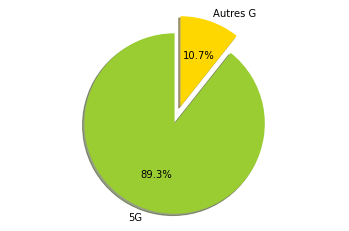

In [22]:
labels = ['5G', 'Autres G']
sizes = [taux_departements_5G, taux_departements_sans_5G]
colors = ['yellowgreen', 'gold']
explode = (0, 0.2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

### Affichage par carte

In [23]:
# Taux dernière techno des sites mobiles par départements 
taux_dernière_techno_par_dep = dataframe.groupby(['dep_name'])['last_technology'].value_counts(normalize=True)
taux_dernière_techno_par_dep

dep_name  last_technology
Ain       4G                 0.882979
          5G                 0.095745
          3G                 0.021277
Aisne     4G                 0.787234
          5G                 0.180851
                               ...   
Yonne     3G                 0.018349
          2G                 0.009174
Yvelines  4G                 0.787500
          5G                 0.200000
          3G                 0.012500
Name: last_technology, Length: 287, dtype: float64

In [24]:
dataframe[['dep_name', 'geo_shape']]

,dep_name,geo_shape
0,Var,"{'type': 'MultiPoint', 'coordinates': [[5.8829..."
1,Var,"{'type': 'MultiPoint', 'coordinates': [[5.8624..."
2,Var,"{'type': 'MultiPoint', 'coordinates': [[5.8244..."
3,Var,"{'type': 'MultiPoint', 'coordinates': [[6.0461..."
4,Var,"{'type': 'MultiPoint', 'coordinates': [[6.0486..."
...,...,...
9995,Alpes-Maritimes,"{'type': 'MultiPoint', 'coordinates': [[7.2505..."
9996,Alpes-Maritimes,"{'type': 'MultiPoint', 'coordinates': [[7.2542..."
9997,Alpes-Maritimes,"{'type': 'MultiPoint', 'coordinates': [[7.2265..."
9998,Alpes-Maritimes,"{'type': 'MultiPoint', 'coordinates': [[7.3077..."


In [ ]:
state_geo = dataframe[['dep_name', 'geo_shape']]
state_data = taux_dernière_techno_par_dep

m = folium.Map(location=[47, 2], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["dep_name", "last_technology"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Taux de couverture 5G (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

## Par Régions

In [26]:
## Liste des régions qui ont la 5G
liste_regions_5G = dataframe.query('last_technology.str.contains("5G")', engine="python").filter(items=['reg_name']).drop_duplicates(subset=['reg_name'])
liste_regions_5G

,reg_name
3,Provence-Alpes-Côte d'Azur
49,Pays de la Loire
80,Nouvelle-Aquitaine
132,Grand Est
168,Bourgogne-Franche-Comté
192,Île-de-France
440,Normandie
615,Hauts-de-France
637,Occitanie
811,Auvergne-Rhône-Alpes


### Calcul du pourcentage

In [27]:
## Effectif de régions dotés de la 5G
nb_regions_5G = liste_regions_5G.count()['reg_name']
nb_regions_5G

13

In [28]:
## Effectif des régions sans aucune 5G
nb_regions = dataframe.filter(items=['reg_name']).drop_duplicates(subset=['reg_name']).count()['reg_name']
nb_regions_autreG = nb_regions - nb_regions_5G
nb_regions_autreG

7

### Affichage du diagramme

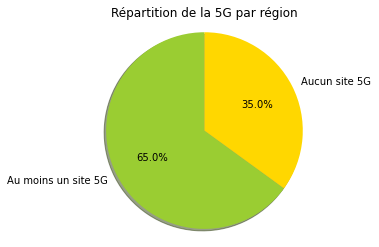

In [29]:
labels = ['Au moins un site 5G', 'Aucun site 5G']
sizes = [nb_regions_5G, nb_regions_autreG]
colors = ['yellowgreen', 'gold']

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
ax.set_title("Répartition de la 5G par région")

plt.show()